# Zdemo
This macro is an example of graphs in log scales with annotations.

The presented results
 are predictions of invariant cross-section of Direct Photons produced
 at RHIC energies, based on the universality of scaling function H(z).


 These Figures were published in JINR preprint E2-98-64, Dubna,
 1998 and submitted to CPC.




**Author:**  Michael Tokarev, Elena Potrebenikova (JINR Dubna)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:31 AM.</small></i>

In [1]:
import ROOT
from array import array

NMAX = 20
Z      = array( 'f', [0.]*NMAX )
HZ     = array( 'f', [0.]*NMAX )
PT     = array( 'f', [0.]*NMAX )
INVSIG = array( 'f', [0.]*NMAX )

NLOOP = 0
saves = {}

Welcome to JupyROOT 6.18/03


______________________________________________________________________________

In [2]:
def hz_calc( ENERG, DENS, TGRAD, PTMIN, PTMAX, DELP ):
   from math import sin, cos, sqrt
   global NLOOP
   global Z, HZ, PT, INVSIG

   CSEFT= 1.
   GM1  = 0.00001
   GM2  = 0.00001
   A1   = 1.
   A2   = 1.
   ALX  = 2.
   BETA = 1.
   KF1  = 8.E-7
   KF2  = 5.215

   MN = 0.9383
   DEGRAD=0.01745329

  #   print 'ENR=  %f DENS= %f PTMIN= %f PTMAX= %f DELP= %f ' % (ENERG,DENS,PTMIN,PTMAX,DELP)

   DNDETA= DENS
   MB1   = MN*A1
   MB2   = MN*A2
   EB1   = ENERG/2.*A1
   EB2   = ENERG/2.*A2
   M1    = GM1
   M2    = GM2
   THET  = TGRAD*DEGRAD
   NLOOP = int((PTMAX-PTMIN)/DELP)

   for I in range(NLOOP):
      PT[I]=PTMIN+I*DELP
      PTOT = PT[I]/sin(THET)

      ETOT = sqrt(M1*M1 + PTOT*PTOT)
      PB1  = sqrt(EB1*EB1 - MB1*MB1)
      PB2  = sqrt(EB2*EB2 - MB2*MB2)
      P2P3 = EB2*ETOT+PB2*PTOT*cos(THET)
      P1P2 = EB2*EB1+PB2*PB1
      P1P3 = EB1*ETOT-PB1*PTOT*cos(THET)

      X1 = P2P3/P1P2
      X2 = P1P3/P1P2
      Y1 = X1+sqrt(X1*X2*(1.-X1)/(1.-X2))
      Y2 = X2+sqrt(X1*X2*(1.-X2)/(1.-X1))

      S    = (MB1*MB1)+2.*P1P2+(MB2*MB2)
      SMIN = 4.*((MB1*MB1)*(X1*X1) +2.*X1*X2*P1P2+(MB2*MB2)*(X2*X2))
      SX1  = 4.*( 2*(MB1*MB1)*X1+2*X2*P1P2)
      SX2  = 4.*( 2*(MB2*MB2)*X2+2*X1*P1P2)
      SX1X2= 4.*(2*P1P2)
      DELM = pow((1.-Y1)*(1.-Y2),ALX)

      Z[I] = sqrt(SMIN)/DELM/pow(DNDETA,BETA)

      Y1X1  = 1. +X2*(1-2.*X1)/(2.*(Y1-X1)*(1.-X2))
      Y1X2  =     X1*(1-X1)/(2.*(Y1-X1)*(1.-X2)*(1.-X2))
      Y2X1  =     X2*(1-X2)/(2.*(Y2-X2)*(1.-X1)*(1.-X1))
      Y2X2  = 1. +X1*(1-2.*X2)/(2.*(Y2-X2)*(1.-X1))
      Y2X1X2= Y2X1*( (1.-2.*X2)/(X2*(1-X2)) -( Y2X2-1.)/(Y2-X2))
      Y1X1X2= Y1X2*( (1.-2.*X1)/(X1*(1-X1)) -( Y1X1-1.)/(Y1-X1))

      KX1=-DELM*(Y1X1*ALX/(1.-Y1) + Y2X1*ALX/(1.-Y2))
      KX2=-DELM*(Y2X2*ALX/(1.-Y2) + Y1X2*ALX/(1.-Y1))
      ZX1=Z[I]*(SX1/(2.*SMIN)-KX1/DELM)
      ZX2=Z[I]*(SX2/(2.*SMIN)-KX2/DELM)

      H1=ZX1*ZX2

      HZ[I]=KF1/pow(Z[I],KF2)
      INVSIG[I]=(HZ[I]*H1*16.)/S

______________________________________________________________________________

In [3]:
from array import array
global NLOOP
global Z, HZ, PT, INVSIG
global saves
global hz_calc

Create a new canvas.

In [4]:
c1 = ROOT.TCanvas( 'zdemo', 'Monte Carlo Study of Z scaling', 10, 40, 800, 600 )
c1.Range( 0, 0, 25, 18 )
c1.SetFillColor( 40 )
saves[ 'c1' ] = c1                        # prevent deteletion at end of zdemo

pl = ROOT.TPaveLabel( 1, 16.3, 24, 17.5,
    'Z-scaling of Direct Photon Productions in pp Collisions at RHIC Energies', 'br' )
pl.SetFillColor(18)
pl.SetTextFont(32)
pl.SetTextColor(49)
pl.Draw()
saves[ 'pl' ] = pl

t = ROOT.TLatex()
t.SetTextFont(32)
t.SetTextColor(1)
t.SetTextSize(0.03)
t.SetTextAlign(12)
t.DrawLatex( 3.1, 15.5, 'M.Tokarev, E.Potrebenikova ')
t.DrawLatex( 14., 15.5, 'JINR preprint E2-98-64, Dubna, 1998 ')
saves[ 't' ] = t

pad1 = ROOT.TPad( 'pad1', 'This is pad1', 0.02, 0.02, 0.48, 0.83, 33 )
pad2 = ROOT.TPad( 'pad2', 'This is pad2', 0.52, 0.02, 0.98, 0.83, 33 )

pad1.Draw()
pad2.Draw()

saves[ 'pad1' ] = pad1; saves[ 'pad2' ] = pad2

Cross-section of direct photon production in pp collisions at 500 GeV vs Pt

In [5]:
energ = 63
dens  = 1.766
tgrad = 90.
ptmin = 4.
ptmax = 24.
delp  = 2.
hz_calc( energ, dens, tgrad, ptmin, ptmax, delp )
pad1.cd()
pad1.Range( -0.255174, -19.25, 2.29657, -6.75 )
pad1.SetLogx()
pad1.SetLogy()

create a 2-d histogram to define the range

In [6]:
pad1.DrawFrame( 1, 1e-18, 110, 1e-8 )
pad1.GetFrame().SetFillColor( 19 )
t = ROOT.TLatex()
t.SetNDC()
t.SetTextFont( 62 )
t.SetTextColor( 36 )
t.SetTextSize( 0.08 )
t.SetTextAlign( 12 )
t.DrawLatex( 0.6, 0.85, 'p - p' )

t.SetTextSize( 0.05 )
t.DrawLatex( 0.6, 0.79, 'Direct #gamma' )
t.DrawLatex( 0.6, 0.75, '#theta = 90^{o}' )

t.DrawLatex( 0.20, 0.45, 'Ed^{3}#sigma/dq^{3}' )
t.DrawLatex( 0.18, 0.40, '(barn/Gev^{2})' )

t.SetTextSize( 0.045 )
t.SetTextColor( ROOT.kBlue )
t.DrawLatex( 0.22, 0.260, '#sqrt{s} = 63(GeV)' )
t.SetTextColor( ROOT.kRed )
t.DrawLatex( 0.22, 0.205,'#sqrt{s} = 200(GeV)' )
t.SetTextColor( 6 )
t.DrawLatex( 0.22, 0.15, '#sqrt{s} = 500(GeV)' )

t.SetTextSize( 0.05 )
t.SetTextColor( 1 )
t.DrawLatex( 0.6, 0.06, 'q_{T} (Gev/c)' )
saves[ 't2' ] = t                         # note the label that is used!

gr1 = ROOT.TGraph( NLOOP, PT, INVSIG )

gr1.SetLineColor( 38 )
gr1.SetMarkerColor( ROOT.kBlue )
gr1.SetMarkerStyle( 21 )
gr1.SetMarkerSize( 1.1 )
gr1.Draw( 'LP' )
saves[ 'gr1' ] = gr1

Cross-section of direct photon production in pp collisions at 200 GeV vs Pt

In [7]:
energ = 200
dens  = 2.25
tgrad = 90.
ptmin = 4.
ptmax = 64.
delp  = 6.
hz_calc( energ, dens, tgrad, ptmin, ptmax, delp )

gr2 = ROOT.TGraph( NLOOP, PT, INVSIG )
gr2.SetLineColor( 38 )
gr2.SetMarkerColor( ROOT.kRed )
gr2.SetMarkerStyle( 29 )
gr2.SetMarkerSize( 1.5 )
gr2.Draw( 'LP' )
saves[ 'gr2' ] = gr2

Cross-section of direct photon production in pp collisions at 500 GeV vs Pt

In [8]:
energ = 500
dens  = 2.73
tgrad = 90.
ptmin = 4.
ptmax = 104.
delp  = 10.
hz_calc( energ, dens, tgrad, ptmin, ptmax, delp )

gr3 = ROOT.TGraph( NLOOP, PT, INVSIG )

gr3.SetLineColor( 38 )
gr3.SetMarkerColor( 6 )
gr3.SetMarkerStyle( 8 )
gr3.SetMarkerSize( 1.1 )
gr3.Draw( 'LP' )
saves[ 'gr3' ] = gr3

dum = array( 'f', [0.] )
graph = ROOT.TGraph( 1, dum, dum )
graph.SetMarkerColor( ROOT.kBlue )
graph.SetMarkerStyle( 21 )
graph.SetMarkerSize( 1.1 )
graph.SetPoint( 0, 1.7, 1.e-16 )
graph.Draw( 'LP' )
saves[ 'graph' ] = graph

graph = ROOT.TGraph( 1, dum, dum )
graph.SetMarkerColor( ROOT.kRed )
graph.SetMarkerStyle( 29 )
graph.SetMarkerSize( 1.5 )
graph.SetPoint( 0, 1.7, 2.e-17 )
graph.Draw( 'LP' )
saves[ 'graph2' ] = graph                 # note the label that is used!

graph = ROOT.TGraph( 1, dum, dum )
graph.SetMarkerColor( 6 )
graph.SetMarkerStyle( 8 )
graph.SetMarkerSize( 1.1 )
graph.SetPoint( 0, 1.7, 4.e-18)
graph.Draw( 'LP' )
saves[ 'graph3' ] = graph                 # note the label that is used!

pad2.cd()
pad2.Range( -0.43642, -23.75, 3.92778, -6.25 )
pad2.SetLogx()
pad2.SetLogy()

pad2.DrawFrame( 1, 1e-22, 3100, 1e-8 )
pad2.GetFrame().SetFillColor( 19 )

gr = ROOT.TGraph( NLOOP, Z, HZ )
gr.SetTitle( 'HZ vs Z' )
gr.SetFillColor( 19 )
gr.SetLineColor( 9 )
gr.SetMarkerColor( 50 )
gr.SetMarkerStyle( 29 )
gr.SetMarkerSize( 1.5 )
gr.Draw( 'LP' )
saves[ 'gr' ] = gr

t = ROOT.TLatex()
t.SetNDC()
t.SetTextFont( 62 )
t.SetTextColor( 36 )
t.SetTextSize( 0.08 )
t.SetTextAlign( 12 )
t.DrawLatex( 0.6, 0.85, 'p - p' )

t.SetTextSize( 0.05 )
t.DrawLatex( 0.6, 0.79, 'Direct #gamma' )
t.DrawLatex( 0.6, 0.75, '#theta = 90^{o}' )

t.DrawLatex( 0.70, 0.55, 'H(z)' )
t.DrawLatex( 0.68, 0.50, '(barn)' )

t.SetTextSize( 0.045 )
t.SetTextColor( 46 )
t.DrawLatex( 0.20, 0.30, '#sqrt{s}, GeV' )
t.DrawLatex( 0.22, 0.26, '63' )
t.DrawLatex( 0.22, 0.22, '200' )
t.DrawLatex( 0.22, 0.18, '500' )

t.SetTextSize( 0.05 )
t.SetTextColor( 1 )
t.DrawLatex( 0.88, 0.06, 'z' )
saves[ 't3' ] = t                         # note the label that is used!

c1.Modified()
c1.Update()

Draw all canvases 

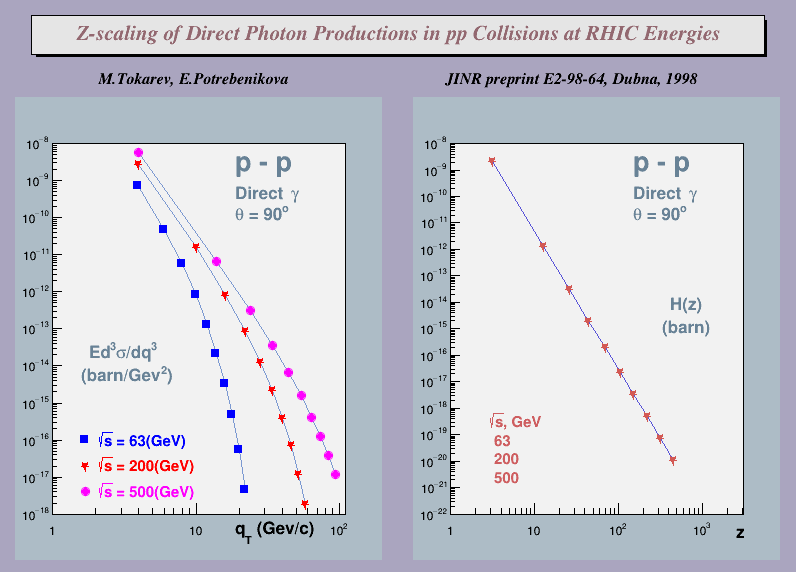

In [9]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()